In [1]:
words=open('names.txt',"r").read().splitlines()

In [9]:
len(words)

32033

In [17]:
print(min(len(w) for w in words)," ",max(len(w) for w in words))

2   15


**Bigram:** - 2 characters at a time

In [2]:
b={} #bigram dict to map bigram to freq count

for w in words:
    clist=["<S>"] + list(w) + ["<E>"] #adding start and end tokens to identify each word 
    for char1, char2 in zip(clist,clist[1:]): #<S>e em mm ma a<E>
        bigram=(char1, char2) #tuple of bigram
        b[bigram]=b.get(bigram,0)+1 #default 0 if bigram is not found else increment by 1 -- stores frequency for each bigram

In [3]:
sfreq=sorted(b.items(),key=lambda pair: -pair[1]) #.items creates a kv tuple, it is sorted based on the 2nd item of that tuple(value) in reverse
sfreq[:20]#this gives the the most common bigrams

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422)]

In [4]:
#Converting bigram dict to 2d Tensor array - rows=first character, columns=second character
import torch
N=torch.zeros((28,28), dtype=torch.int32) #26 alphabets + start and end token = 28 

/home/abshk/anaconda3/envs/deeplearning/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
wstring=set(''.join(words)) #concatenate all the words to a whole string
chars=sorted(list(wstring)) #sorted list containing 26 alphabets
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

Look up table:

In [88]:
#alphabet lookup for mapping characters
char_map_index={c:i for i,c in enumerate(chars)} #maps value to the index
char_map_index['<S>']=26
char_map_index['<E>']=27

In [89]:
char_map_index["z"]

25

In [90]:
for w in words:
    clist=["<S>"] + list(w) + ["<E>"] 
    for char1, char2 in zip(clist,clist[1:]): 
        
        index1=char_map_index[char1] #map char to get index
        index2=char_map_index[char2]
        
        N[index1, index2] += 1
        

In [91]:
#creating the inverse lookup
index_map_char={i:c for c,i in char_map_index.items()}

In [92]:
index_map_char

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

index 

(-0.5, 27.5, 27.5, -0.5)

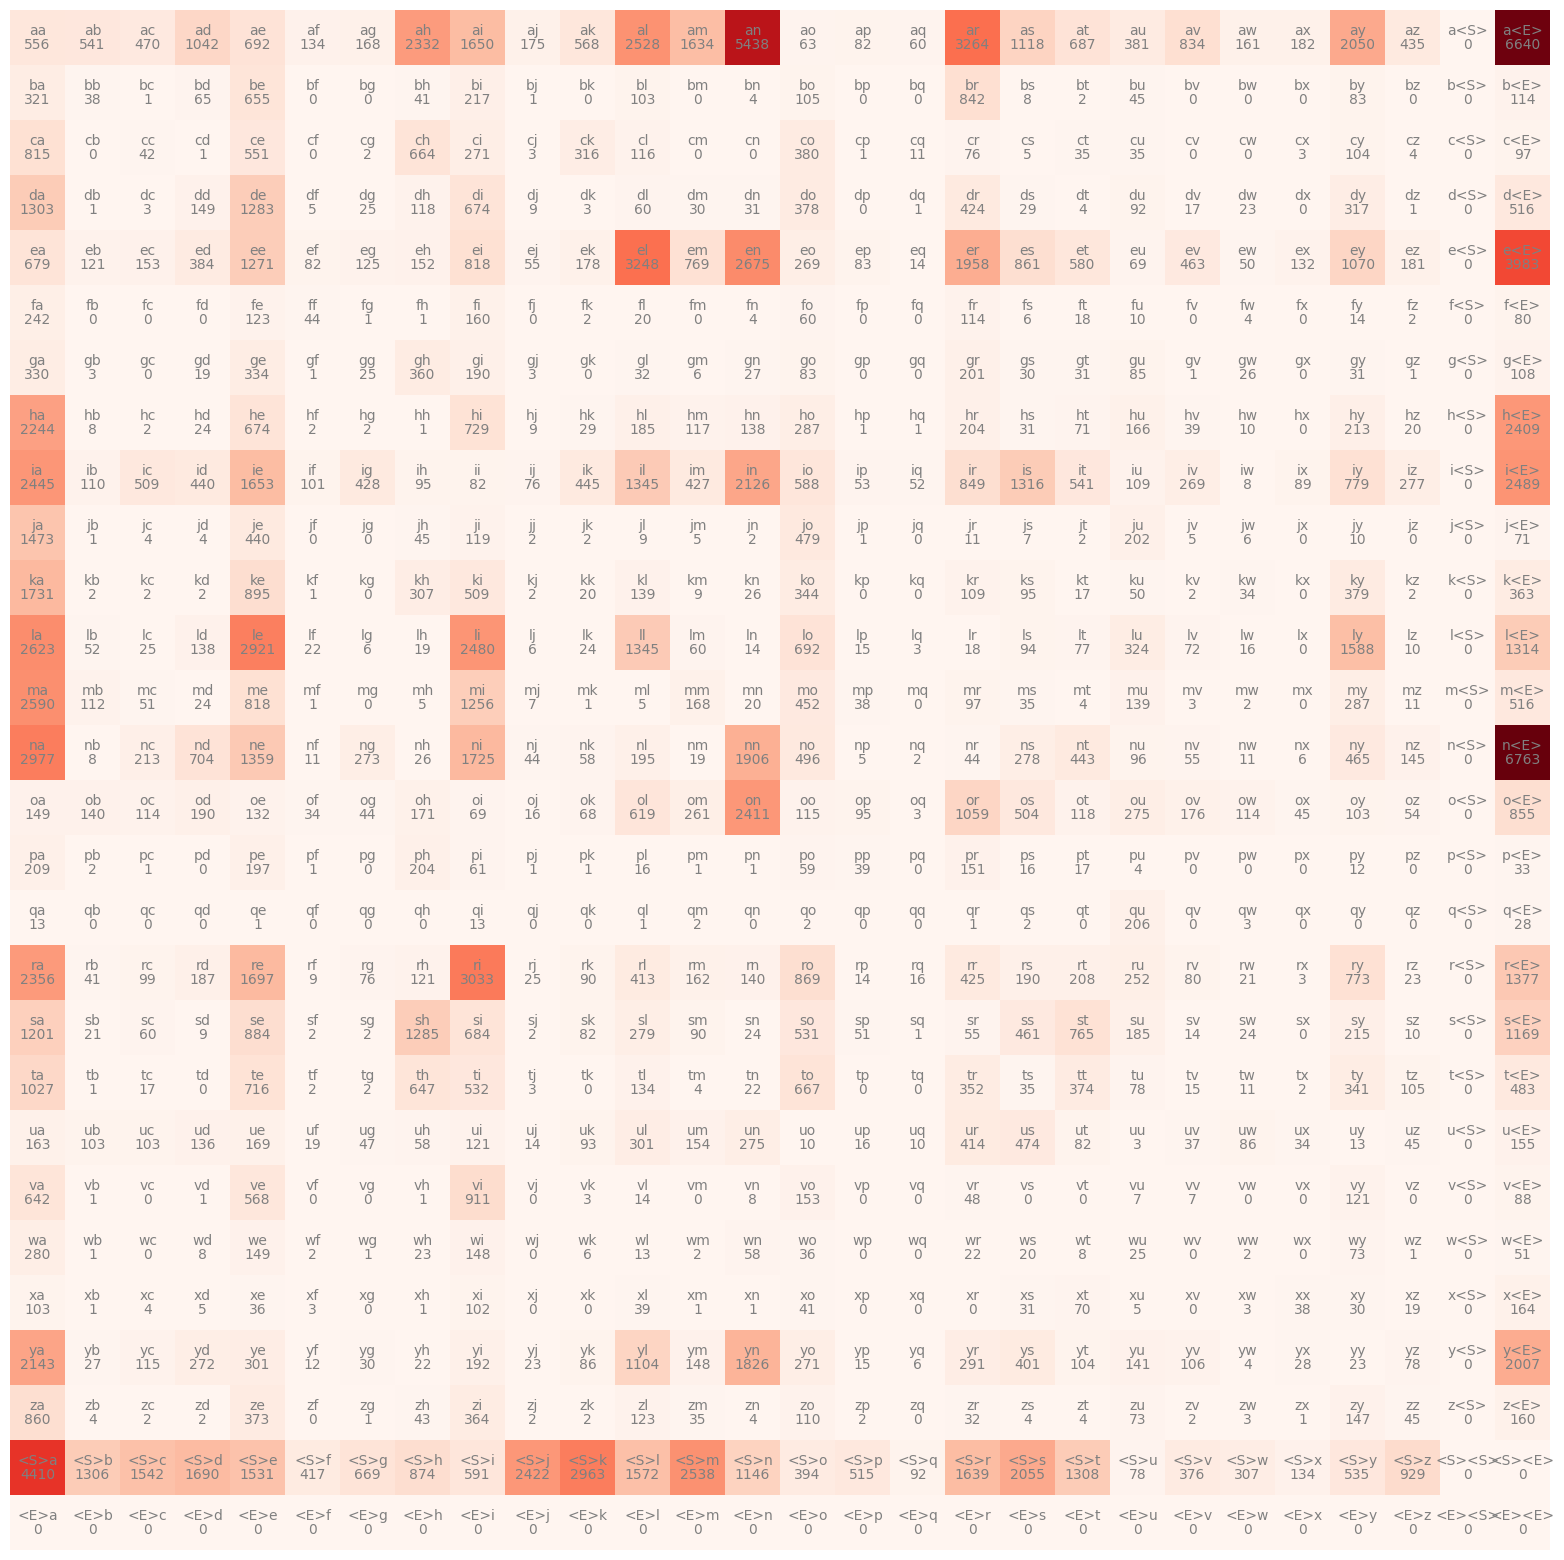

In [93]:
import matplotlib.pyplot as plt

def plot(N,num1,num2):    
    plt.figure(figsize=(20,20))
    plt.imshow(N, cmap='Reds')
    for i in range(num1):
        for j in range(num2):
            strchar_combo=index_map_char[i] + index_map_char[j]

            plt.text(j,i,strchar_combo, ha="center", va="bottom", color="gray")
            plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
    plt.axis("off")

plot(N,28,28)


Replacing the start and end tokens with "."

In [6]:
N=torch.zeros((27,27), dtype=torch.int32) #26 + one token

In [7]:
char_map_index={c:i+1 for i,c in enumerate(chars)} #a starts from 1
char_map_index["."]=0 #offset the token to the zeroth index
index_map_char={i:c for c,i in char_map_index.items()}

In [8]:
index_map_char

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [9]:
for w in words:
    clist=["."] + list(w) + ["."] 
    for char1, char2 in zip(clist,clist[1:]): 
        
        index1=char_map_index[char1] #map char to get index
        index2=char_map_index[char2]
        
        N[index1, index2] += 1

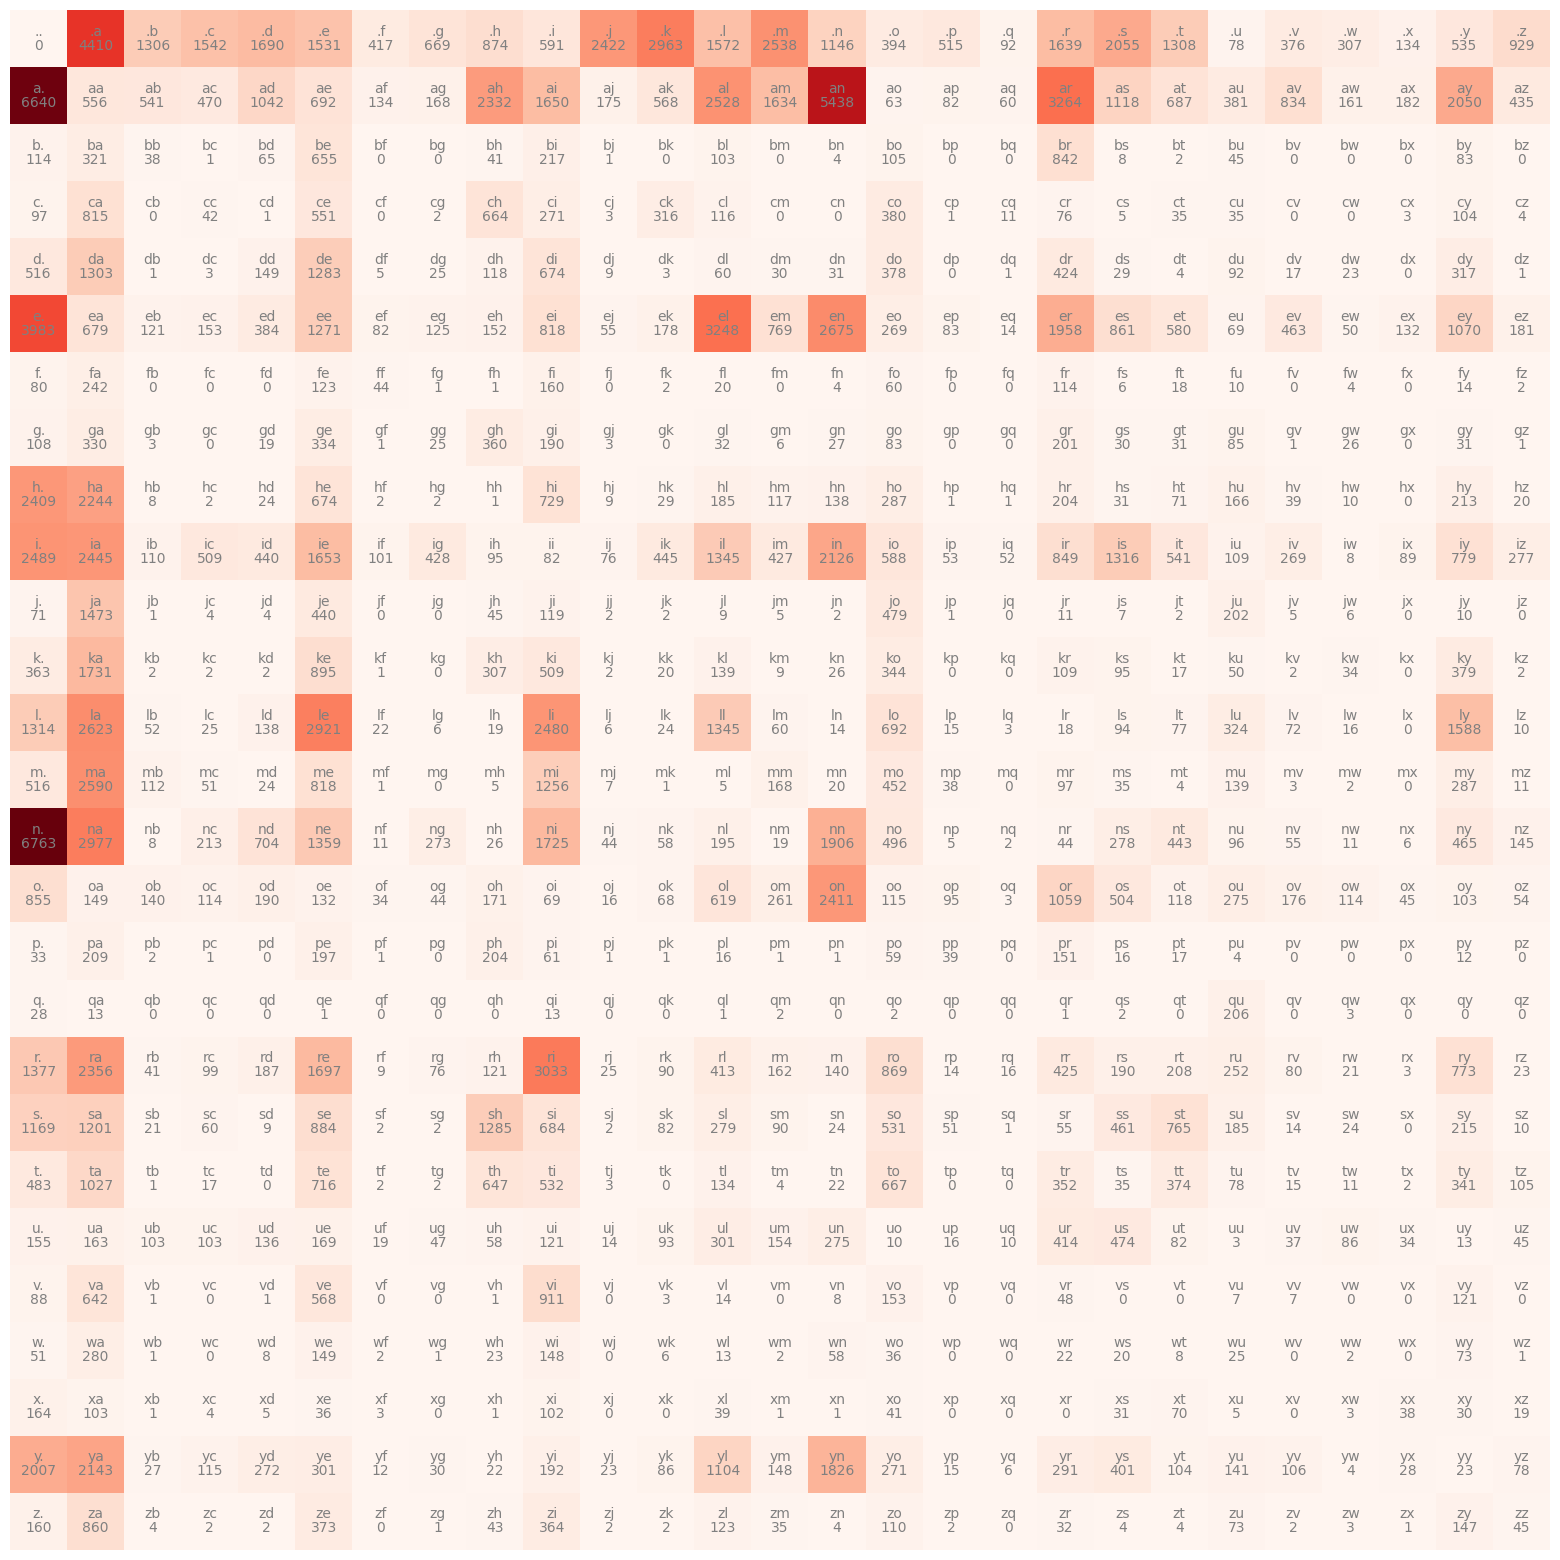

In [103]:
plot(N, 27, 27)
#rows-end columns-start

**NORMALIZATION** - to get prob values:

In [10]:
P=N.float()

In [11]:
P.sum(1, keepdim=True) #dim-27,1 Sum of rows column wise gives 27 rows 1 column result

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

EQUIVALENT TRAINING PHASE - **Statistical Modelling**

In [12]:
P = P / P.sum(1,keepdim=True) #27,1 column vector divides P-27,27 in each cell row wise by duplicating it column wise  torch-broadcasting semantics

**Generate samples from P:**

In [13]:
#the p values in P are the model's parameters - probability values for each bigram

gen=torch.Generator().manual_seed(2147483647) #same generator

for i in range(30):
    out=[]
    index=0
    while True:
        p=P[index]
        index=torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item() #generates an index(char) using the multinomial distribution based off of p probability val of the bigrams for the consecutive characters 
        out.append(index_map_char[index])
        if index == 0:
            break;
    
    print(''.join(out)) #join individual char-lists to a string

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.
torrederahnn.
ellovyllobrpin.
a.
wai.
kn.
jaieendenelele.
kianu.
eryly.
zeeieil.
kayvirgiynenn.


**LOSS FUNCTION** - average of negative log likelihood of probabilty values for a given set of bigrams

In [22]:
#model's lilelihood to predict the bigram from a given string
llikelihood=0.0
count=0
for w in ["abhishek"]:
    clist=["."] + list(w) + ["."] 
    for char1, char2 in zip(clist,clist[1:]): 
        
        index1=char_map_index[char1] #map char to get index
        index2=char_map_index[char2]
        
        prob=P[index1, index2]
        logprob=torch.log(prob) #prob: 0 -> 1 :: log of prob: 0 -> -infinity
        llikelihood += logprob
        count +=1
        
        print(f"{char1}{char2} : prob = {prob:.4f} | logprob = {logprob:.4f}")
        
print(f"\n Log Likelihood = {llikelihood}")

avg=-llikelihood/count #neg llilkehood (inverse)
print(f" Average Inverse Log Likelihood = {avg}") #lower is better
        

.a : prob = 0.1377 | logprob = -1.9829
ab : prob = 0.0160 | logprob = -4.1373
bh : prob = 0.0155 | logprob = -4.1669
hi : prob = 0.0957 | logprob = -2.3463
is : prob = 0.0743 | logprob = -2.5990
sh : prob = 0.1585 | logprob = -1.8418
he : prob = 0.0885 | logprob = -2.4248
ek : prob = 0.0087 | logprob = -4.7426
k. : prob = 0.0720 | logprob = -2.6308

 Log Likelihood = -26.872426986694336
 Average Inverse Log Likelihood = 2.985825300216675
